# Homework 1 (100 points)

The goal of this homework is to practice using [pandas](https://pypi.org/project/pandas/) methods. If your:

1. code is taking a long time to run
2. code involves for loops or while loops

look through the pandas documentation for alternatives.

## Exercise 1 (60 points)

This exercise will use the [Titanic dataset](https://www.kaggle.com/c/titanic/data) (https://www.kaggle.com/c/titanic/data). Download the file named `train.csv` and place it in the same folder as this notebook.

a) Write a function that reads in a filepath to a csv and returns the DataFrame. (5 points)

In [3]:
import pandas as pd

df = pd.read_csv('train.csv')
print(len(df))
df.describe()

891


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


b) Write a function that returns the number of rows that have at least one empty column value - (2.5 points)

In [4]:
def num_nans(df):
     
    return len(df)-len(df.dropna())

print("there are " +  str(num_nans(df)) + " rows with at least one empty value")

there are 708 rows with at least one empty value


c) Write a function that removes all columns with more than 200 NaN values - (2.5 points)

In [5]:
def drop_na(df):
    return df.drop(df.columns[df.isnull().sum()>200], axis=1)
# df.isna().sum(axis=0)>200
# df=df.dropna(axis=1, thresh=len(df.columns)-200)
# display(df)
# df.describe()
# df.dropna(axis=1)
df = drop_na(df)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

d) Write a function that replaces `male` with 0 and `female` with 1 - (2.5 points)

In [6]:
def aux(row):
    if row['Sex']=='female':
        return 1
    else:
        return 0

def to_numerical(df):
    return  df.apply(lambda row: aux(row), axis=1)


df['Sex'] = to_numerical(df)
df.head()
display(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C


e)  Write a function that adds four columns `First Name`, `Middle Name`, `Last Name`, and `Title` corresponding to the value in the `name` column. - (5 points) 

For example: `Braund, Mr. Owen Harris` would be: 

|First Name | Middle Name | Last Name | Title |
|-----------|-------------|-----------|-------|
| Owen      |  Harris     |  Braund   | Mr    |

In [7]:
import numpy as np

def extract_names(df):
    first_names = df['Name'].str.split().str[2]
    titles = df['Name'].str.split().str[1]
    last_names = df['Name'].str.split().str[0].str.strip(',')
    middle_names = df['Name'].str.split().str[3]
    
    df_first_name = pd.DataFrame(first_names)
    df_title = pd.DataFrame(titles)
    df_last_name = pd.DataFrame(last_names)
    df_middle_name = pd.DataFrame(middle_names)
    
    return [df_first_name,df_middle_name,df_last_name,df_title];
df[['First Name', 'Middle Name', 'Last Name', 'Title']] = extract_names(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Owen,Harris,Braund,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,John,Bradley,Cumings,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Laina,NaN,Heikkinen,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,Jacques,Heath,Futrelle,Mrs.
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,William,Henry,Allen,Mr.


f) Write a function that replaces all missing ages with the average age - (2.5 points)

In [8]:
def replace_with_mean(df):
    average_age = df['Age'].mean()
    return df['Age'].fillna(average_age)

df['Age'] = replace_with_mean(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Owen,Harris,Braund,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,John,Bradley,Cumings,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Laina,NaN,Heikkinen,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,Jacques,Heath,Futrelle,Mrs.
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,William,Henry,Allen,Mr.


The next set of questions focus on visualization. Please use pandas and [matplotlib](https://pypi.org/project/matplotlib/) for all plotting.

g) Plot a bar chart of the average age of those that survived and did not survive. Briefly comment on what you observe. - (2.5 points)

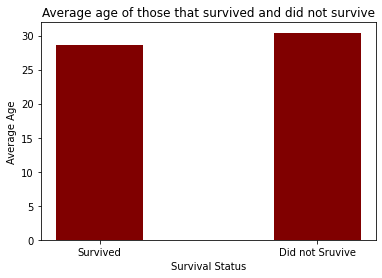

In [9]:
import matplotlib.pyplot as plt

def calc_avg_age(df):
    return (df[df['Survived']==1]['Age'].mean(),df[df['Survived']==0]['Age'].mean());

(a,b) = calc_avg_age(df)

x=['Survived','Did not Sruvive']
y=[a,b]

# creating the bar plot
plt.bar(x, y, color ='maroon',width = 0.4)

plt.xlabel("Survival Status")
plt.ylabel("Average Age")
plt.title("Average age of those that survived and did not survive")
plt.show()

Looking at the bar chart, it can be mentioned that those who survived this disaster are older than the people who did not survive. 

h) Plot a bar chart of the proportion that survived for male and female. Briefly comment on what you observe. - (2.5 points)

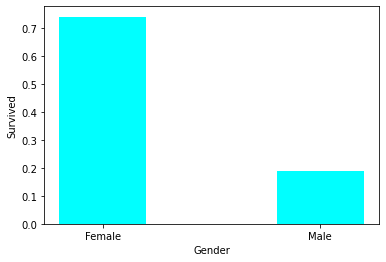

In [10]:
import matplotlib.pyplot as plt

def gender(df):
    survived_females = df[df['Survived']==1]['Sex'].sum()
    total_number_of_females = df['Sex'].sum()
    total_number_of_males = len(df) - total_number_of_females
    survived_males = len(df[df['Survived']==1])- df[df['Survived']==1]['Sex'].sum()
    prop_females = survived_females/total_number_of_females
    prop_males = survived_males/total_number_of_males
    return (prop_females,prop_males)


y = gender(df)
x=['Female','Male']
width = 0.4
plt.bar(x, y, width, color='cyan')
plt.xlabel("Gender")
plt.ylabel("Survived")
plt.show()


It can observed that the proportion of survived females is way much higher than that of survived males.

i) Plot a bar chart of the proportion that survived for each title. Briefly comment on what you observe. - (5 points)

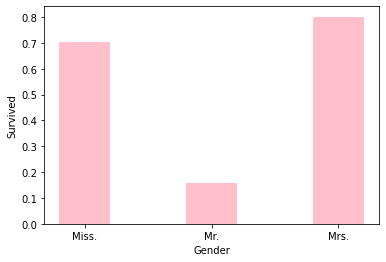

In [11]:
def survived_per_titles(df):
    survived_ms = len(df.loc[(df['Survived']==1) & (df['Title']=='Miss.')])
    total_ms = len(df[df['Title']=='Miss.'])
    
    survived_mr = len(df.loc[(df['Survived']==1) & (df['Title']=='Mr.')])
    total_mr = len(df[df['Title']=='Mr.'])
    
    survived_mrs = len(df.loc[(df['Survived']==1) & (df['Title']=='Mrs.')])
    total_mrs = len(df[df['Title']=='Mrs.'])
    
    return (survived_ms/total_ms, survived_mr/total_mr, survived_mrs/total_mrs);

x = ['Miss.', 'Mr.','Mrs.']
y = survived_per_titles(df)

width = 0.4
plt.bar(x, y, width, color='pink')
plt.xlabel("Gender")
plt.ylabel("Survived")
plt.show()

-> your answer here

j) Plot a bar chart of the average fare for those that survived and those that did not survive. Briefly comment on what you observe. - (5 points)

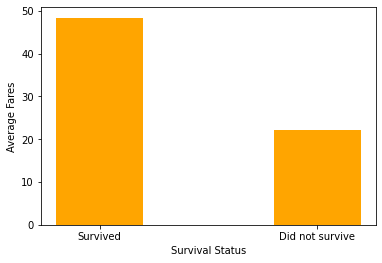

In [12]:
import matplotlib.pyplot as plt

def average_fair(df): 
    return(df[df['Survived']==1]['Fare'].mean(),df[df['Survived']==0]['Fare'].mean());
    

y=average_fair(df)
x=['Survived','Did not survive']
width = 0.4
plt.bar(x, y, width, color='orange')
plt.xlabel("Survival Status")
plt.ylabel("Average Fares")
plt.show()

It can be observed that an average ticker price of those who survived the crash was higher than that of those who did not survived. This means that it was most likely that wealthier people had better chances of being saved

k) Create a boxplot for the fare of those that survived and those that did not survive. Briefly comment on what you observe. - (5 points)

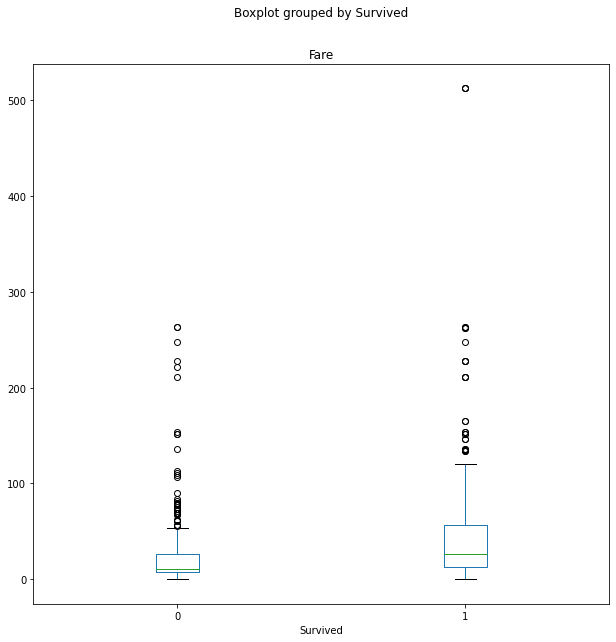

In [13]:
plt = df.boxplot(by ='Survived', column = ['Fare'], grid = False, figsize =(10, 10))

# plt.xticks([0, 1], )
# # # Creating plot
# plt.boxplot(data)
 
# # show plot
# plt.show()

There are a couple of things to mention about this box plot. First of all, interquartile range (IQR) for those who survived is larger than that of those who did not survive, which means that the central portion of survived people had spread-out fares. Also, it can be noted that there are many more outliers for those who did not survive. Lastly, the range of survived people's fares is greater than that of people who did not survive. This means that the minimum and maximum fares of survived people differed significantly rather than those of people who did not survive.  

k) Create a function to subtract the mean fare from the actual fare then divide by the standard deviation - (2.5 points)

In [14]:
def replace(df):
    std=df['Fare'].std()
    average_fare = df['Fare'].mean()
    new_values=[]
    for row in df['Fare']:
        row = (row-average_fare)/std
        new_values.append(row)
    df['Fare'] = new_values
    return df

replace(df) #replacing all the values in the column "Fares" with their corresponding calculated values
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,-0.502163,S,Owen,Harris,Braund,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,0.786404,C,John,Bradley,Cumings,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,-0.488580,S,Laina,NaN,Heikkinen,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,0.420494,S,Jacques,Heath,Futrelle,Mrs.
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,-0.486064,S,William,Henry,Allen,Mr.


l) Remove all non-numerical columns from the dataframe. - (2.5 points)

In [15]:
df= df.select_dtypes(['number'])
display(df)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,0,22.000000,1,0,-0.502163
1,2,1,1,1,38.000000,1,0,0.786404
2,3,1,3,1,26.000000,0,0,-0.488580
3,4,1,1,1,35.000000,1,0,0.420494
4,5,0,3,0,35.000000,0,0,-0.486064
...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.000000,0,0,-0.386454
887,888,1,1,1,19.000000,0,0,-0.044356
888,889,0,3,1,29.699118,1,2,-0.176164
889,890,1,1,0,26.000000,0,0,-0.044356


m) Ignoring passenger ID, write a function that returns the names of the N most similar passengers using the euclidean distance? - (15 points)

In [36]:
from sklearn.metrics.pairwise import euclidean_distances

def N_most_similar(df, N):
    return # < your code here >
a= euclidean_distances(df, df)
b = np.argpartition(a, 3, axis=1)[:, :3]
c = b[0]
print(a)
print("The 3 most similar passengers are: " + str(N_most_similar(df, 3)))

[[  0.          16.26838665   4.79585076 ... 888.03625077 889.01249124
  890.05673982]
 [ 16.26838665   0.          12.31363402 ... 887.04443586 888.08259197
  889.02510346]
 [  4.79585076  12.31363402   0.         ... 886.01116306 887.00292972
  888.02139615]
 ...
 [888.03625077 887.04443586 886.01116306 ...   0.           5.06960006
    3.92350301]
 [889.01249124 888.08259197 887.00292972 ...   5.06960006   0.
    6.49618933]
 [890.05673982 889.02510346 888.02139615 ...   3.92350301   6.49618933
    0.        ]]
The 3 most similar passengers are: None


## Exercise 2 - (40 points)

Another way to get data is by using APIs. Here we will be using the google books API (https://developers.google.com/books/docs/overview)

a) Create a list with these topic strings: Python; Data Science; Data Analysis; Machine Learning; and Deep 
Learning. Use these topics, one at a time, to query the Google Books API by modifying the code below. - (5 points)

In [35]:
import requests
import json

"""
    Google Books Api
    See: https://developers.google.com/books/
"""

def get(topic=""):
    BASEURL = 'https://www.googleapis.com/books/v1/volumes'
    headers = {'Content-Type': 'application/json'}

    response = requests.get(BASEURL + "?q=" + topic, headers=headers)

    if response.status_code == 200:
        return json.loads(response.content.decode('utf-8'))

    return response

python = get("Python")
data_science = get("Data Science")
data_analytics = get("Data Analysis")
machine_learning = get("Machine Learning")
deep_learning = get("Deep Learning")

b) For each returned JSON string: Convert the JSON string to a dict using `loads( )` then use this to convert it to a DataFrame: `pd.json_normalize( thedict['items'] )`. Then save them as `.csv`. - (5 points)

In [82]:
df_python = pd.json_normalize(python['items'])
df_data_science = pd.json_normalize(data_science['items'])
df_data_analytics = pd.json_normalize(data_analytics['items'])
df_machine_learning = pd.json_normalize(machine_learning['items'])
df_deep_learning = pd.json_normalize(deep_learning['items'])


#saving dataframes to .csv files
df_python.to_csv('python.csv',index=False)
df_data_science.to_csv('data_science.csv', index = False)
df_data_analytics.to_csv('data_analytics.csv', index = False)
df_deep_learning.to_csv('data_deep_learning.csv', index = False)
df_machine_learning.to_csv('data_machine_learning.csv', index = False)


c) For each DataFrame, relabel `volumeInfo.title` as `Title` and `volumeInfo.authors` as `Authors`. - (5 points)

In [107]:
# your code here

df_python.rename(columns={'volumeInfo.title': 'Title', 'volumeInfo.authors': 'Authors'}, inplace=True)
df_data_science.rename(columns={'volumeInfo.title': 'Title', 'volumeInfo.authors': 'Authors'}, inplace=True)
df_data_analytics.rename(columns={'volumeInfo.title': 'Title', 'volumeInfo.authors': 'Authors'}, inplace=True)
df_machine_learning.rename(columns={'volumeInfo.title': 'Title', 'volumeInfo.authors': 'Authors'}, inplace=True)
df_deep_learning.rename(columns={'volumeInfo.title': 'Title', 'volumeInfo.authors': 'Authors'}, inplace=True)




#turning the column lists to the column of strings for column "Authors"  
df_python['Authors'] = df_python['Authors'].apply(lambda x: ''.join(map(str, x)))
df_data_science['Authors'] = df_data_science['Authors'].apply(lambda x: ''.join(map(str, x)))
df_data_analytics['Authors'] = df_python['Authors'].apply(lambda x: ''.join(map(str, x)))
df_machine_learning['Authors'] = df_python['Authors'].apply(lambda x: ''.join(map(str, x)))
df_deep_learning['Authors'] = df_python['Authors'].apply(lambda x: ''.join(map(str, x)))

#turning the column lists to the column of strings for column "Authors" 

d) For each DataFrame create a new column called `Topic` with the name of the topic from the API query above. Then merge all DataFrames into one and save it to a new `.csv` file. - (10 points)

In [93]:
# your code here
#Creating a new column with the name of the topic
df_python['Topic'] = "Python"
df_data_science['Topic'] = "Data Science"
df_data_analytics['Topic'] = "Data Analytics"
df_machine_learning['Topic'] = "Machine Learning"
df_deep_learning['Topic'] = "Deep Learning"

#merging all the DataFrames
frames = [df_python,df_data_science,df_data_analytics,df_machine_learning,df_deep_learning]
merged_df = pd.concat(frames)
display(merged_df)

,kind,id,etag,selfLink,Title,Authors,volumeInfo.publisher,volumeInfo.publishedDate,volumeInfo.description,volumeInfo.industryIdentifiers,...,volumeInfo.panelizationSummary.containsImageBubbles,saleInfo.listPrice.amount,saleInfo.listPrice.currencyCode,saleInfo.retailPrice.amount,saleInfo.retailPrice.currencyCode,saleInfo.buyLink,saleInfo.offers,accessInfo.epub.acsTokenLink,Topic,accessInfo.pdf.acsTokenLink
0,books#volume,Chr1NDlUcI8C,3Z9Pu/Vxxb0,https://www.googleapis.com/books/v1/volumes/Ch...,Python Essential Reference,David M. Beazley,Addison-Wesley Professional,2009,Presents a guide to the features and library m...,"[{'type': 'ISBN_13', 'identifier': '9780672329...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN
1,books#volume,4pgQfXQvekcC,BxxzIn/MiY4,https://www.googleapis.com/books/v1/volumes/4p...,Learning Python,Mark Lutz,"""O'Reilly Media, Inc.""",2013-06-12,"Get a comprehensive, in-depth introduction to ...","[{'type': 'ISBN_13', 'identifier': '9781449355...",...,False,63.99,USD,63.99,USD,https://play.google.com/store/books/details?id...,"[{'finskyOfferType': 1, 'listPrice': {'amountI...",NaN,Python,NaN
2,books#volume,zjqzDAEACAAJ,ceV6sJGbs04,https://www.googleapis.com/books/v1/volumes/zj...,Python for Everybody,Charles R. Severance,NaN,2016-04-09,Python for Everybody is designed to introduce ...,"[{'type': 'ISBN_10', 'identifier': '1530051126...",...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN
3,books#volume,bTUFCAAAQBAJ,39c6UuwTzA8,https://www.googleapis.com/books/v1/volumes/bT...,Effective Python,Brett Slatkin,Pearson Education,2015,"""It's easy to start writing code with Python: ...","[{'type': 'ISBN_13', 'identifier': '9780134034...",...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN
4,books#volume,aJQILlLxRmAC,IFysFGxhdiE,https://www.googleapis.com/books/v1/volumes/aJ...,Python Programming,John M. Zelle,"Franklin, Beedle & Associates, Inc.",2004,This book is suitable for use in a university-...,"[{'type': 'ISBN_13', 'identifier': '9781887902...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN
5,books#volume,9MS9BQAAQBAJ,accOUjVd1mM,https://www.googleapis.com/books/v1/volumes/9M...,Black Hat Python,Justin Seitz,No Starch Press,2014-12-21,When it comes to creating powerful and effecti...,"[{'type': 'ISBN_13', 'identifier': '9781593275...",...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN
6,books#volume,s_qTvgEACAAJ,XUlfipiYV9E,https://www.googleapis.com/books/v1/volumes/s_...,Violent Python,TJ O'Connor,Syngress,2012-11-22,Violent Python shows you how to move from a th...,"[{'type': 'ISBN_10', 'identifier': '1597499579...",...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN
7,books#volume,aTkzEAAAQBAJ,J90k7jWErj8,https://www.googleapis.com/books/v1/volumes/aT...,The Quick Python Book,Naomi Ceder,Simon and Schuster,2018-05-03,Summary This third revision of Manning's popul...,"[{'type': 'ISBN_13', 'identifier': '9781638353...",...,False,30.99,USD,30.99,USD,https://play.google.com/store/books/details?id...,"[{'finskyOfferType': 1, 'listPrice': {'amountI...",http://books.google.com/books/download/The_Qui...,Python,NaN
8,books#volume,L196MiLaqFIC,0hvZN14XgbI,https://www.googleapis.com/books/v1/volumes/L1...,Python for Software Design,Allen Downey,Cambridge University Press,2009-03-09,Python for Software Design is a concise introd...,"[{'type': 'ISBN_13', 'identifier': '9780521898...",...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN
9,books#volume,H9emM_LGFDEC,drSqsQWpONA,https://www.googleapis.com/books/v1/volumes/H9...,Programming in Python 3,Mark Summerfield,Addison-Wesley Professional,2010,Practical Python 3 for experienced developers:...,"[{'type': 'ISBN_13', 'identifier': '9780321680...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN


e) Write a function that returns all rows whose `Title` contains the word `Data` (case incensitive). - (5 points)

In [95]:
# your code here
def return_title(df):
    result = df[df['Title'].str.contains('Data')]
    if len(result) ==0:
        print("There is no match")
    else:
        return result

display(return_title(merged_df))

,kind,id,etag,selfLink,Title,Authors,volumeInfo.publisher,volumeInfo.publishedDate,volumeInfo.description,volumeInfo.industryIdentifiers,...,volumeInfo.panelizationSummary.containsImageBubbles,saleInfo.listPrice.amount,saleInfo.listPrice.currencyCode,saleInfo.retailPrice.amount,saleInfo.retailPrice.currencyCode,saleInfo.buyLink,saleInfo.offers,accessInfo.epub.acsTokenLink,Topic,accessInfo.pdf.acsTokenLink
0,books#volume,vfi3DQAAQBAJ,qrxqcB5XVP8,https://www.googleapis.com/books/v1/volumes/vf...,R for Data Science,Hadley WickhamGarrett Grolemund,"""O'Reilly Media, Inc.""",2016-12-12,"""This book introduces you to R, RStudio, and t...","[{'type': 'ISBN_13', 'identifier': '9781491910...",...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Data Science,NaN
1,books#volume,TFpVDwAAQBAJ,zFdVCEqqPtc,https://www.googleapis.com/books/v1/volumes/TF...,Data Science,John D. KelleherBrendan Tierney,MIT Press,2018-04-13,A concise introduction to the emerging field o...,"[{'type': 'ISBN_13', 'identifier': '9780262535...",...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Data Science,NaN
2,books#volume,xb29DwAAQBAJ,CyzTsXGdNw8,https://www.googleapis.com/books/v1/volumes/xb...,Introduction to Data Science,Rafael A. Irizarry,CRC Press,2019-11-20,Introduction to Data Science: Data Analysis an...,"[{'type': 'ISBN_13', 'identifier': '9781000708...",...,False,NaN,NaN,NaN,NaN,NaN,NaN,http://books.google.com/books/download/Introdu...,Data Science,http://books.google.com/books/download/Introdu...
3,books#volume,6omNDQAAQBAJ,GYlCg8D/Dyk,https://www.googleapis.com/books/v1/volumes/6o...,Python Data Science Handbook,Jake VanderPlas,"""O'Reilly Media, Inc.""",2016-11-21,"For many researchers, Python is a first-class ...","[{'type': 'ISBN_13', 'identifier': '9781491912...",...,False,59.99,USD,59.99,USD,https://play.google.com/store/books/details?id...,"[{'finskyOfferType': 1, 'listPrice': {'amountI...",NaN,Data Science,NaN
4,books#volume,JYodCAAAQBAJ,TyqE9SPaROw,https://www.googleapis.com/books/v1/volumes/JY...,Data Science from Scratch,Joel Grus,"""O'Reilly Media, Inc.""",2015-04-14,"Data science libraries, frameworks, modules, a...","[{'type': 'ISBN_13', 'identifier': '9781491904...",...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Data Science,NaN
5,books#volume,4ZctAAAAQBAJ,eT1G42rh9SQ,https://www.googleapis.com/books/v1/volumes/4Z...,Data Science for Business,Foster ProvostTom Fawcett,"""O'Reilly Media, Inc.""",2013-07-27,Written by renowned data science experts Foste...,"[{'type': 'ISBN_13', 'identifier': '9781449374...",...,False,33.99,USD,33.99,USD,https://play.google.com/store/books/details?id...,"[{'finskyOfferType': 1, 'listPrice': {'amountI...",NaN,Data Science,NaN
6,books#volume,xDszEAAAQBAJ,DT7pm8SY12g,https://www.googleapis.com/books/v1/volumes/xD...,Build a Career in Data Science,Emily RobinsonJacqueline Nolis,Simon and Schuster,2020-03-06,Summary You are going to need more than techni...,"[{'type': 'ISBN_13', 'identifier': '9781638350...",...,False,28.99,USD,28.99,USD,https://play.google.com/store/books/details?id...,"[{'finskyOfferType': 1, 'listPrice': {'amountI...",http://books.google.com/books/download/Build_a...,Data Science,NaN
7,books#volume,UG76DwAAQBAJ,wjo9GafpYjo,https://www.googleapis.com/books/v1/volumes/UG...,Data Science in Education Using R,Ryan A. EstrelladoEmily A. FreerJesse Mostipak...,Routledge,2020-10-26,Data Science in Education Using R is the go-to...,"[{'type': 'ISBN_13', 'identifier': '9781000200...",...,False,48.95,USD,37.69,USD,https://play.google.com/store/books/details?id...,"[{'finskyOfferType': 1, 'listPrice': {'amountI...",http://books.google.com/books/download/Data_Sc...,Data Science,http://books.google.com/books/download/Data_Sc...
8,books#volume,XiUqEAAAQBAJ,41CW1922pGg,https://www.googleapis.com/books/v1/volumes/Xi...,Responsible Data Science,Peter C. BruceGrant Fleming,John Wiley & Sons,2021-04-13,Explore the most serious prevalent ethical iss...,"[{'type': 'ISBN_13', 'identifier': '9781119741...",...,False,24.00,USD,24.00,USD,https://play.g

f) Write a function that returns all rows whose `Authors` first or last name starts with the letter `E` - (10 points)

In [102]:
# your code here
def return_rows(df):
    return df[df['Authors'].str.contains('E')]

display(return_rows(merged_df))

,kind,id,etag,selfLink,Title,Authors,volumeInfo.publisher,volumeInfo.publishedDate,volumeInfo.description,volumeInfo.industryIdentifiers,...,volumeInfo.panelizationSummary.containsImageBubbles,saleInfo.listPrice.amount,saleInfo.listPrice.currencyCode,saleInfo.retailPrice.amount,saleInfo.retailPrice.currencyCode,saleInfo.buyLink,saleInfo.offers,accessInfo.epub.acsTokenLink,Topic,accessInfo.pdf.acsTokenLink
6,books#volume,xDszEAAAQBAJ,DT7pm8SY12g,https://www.googleapis.com/books/v1/volumes/xD...,Build a Career in Data Science,Emily RobinsonJacqueline Nolis,Simon and Schuster,2020-03-06,Summary You are going to need more than techni...,"[{'type': 'ISBN_13', 'identifier': '9781638350...",...,False,28.99,USD,28.99,USD,https://play.google.com/store/books/details?id...,"[{'finskyOfferType': 1, 'listPrice': {'amountI...",http://books.google.com/books/download/Build_a...,Data Science,NaN
7,books#volume,UG76DwAAQBAJ,wjo9GafpYjo,https://www.googleapis.com/books/v1/volumes/UG...,Data Science in Education Using R,Ryan A. EstrelladoEmily A. FreerJesse Mostipak...,Routledge,2020-10-26,Data Science in Education Using R is the go-to...,"[{'type': 'ISBN_13', 'identifier': '9781000200...",...,False,48.95,USD,37.69,USD,https://play.google.com/store/books/details?id...,"[{'finskyOfferType': 1, 'listPrice': {'amountI...",http://books.google.com/books/download/Data_Sc...,Data Science,http://books.google.com/books/download/Data_Sc...
